# Trabalho 2 - Oxford-IIIT-Pet
##### Names: Ruben Santos e Goncalo Care


##### Indice

In [1]:
# A tarefa de classificacao binaria consiste em distinguir entre imagens de caes e gatos, e a tarefa de classificacao multi-classe consiste em classificar as imagens numa de 37 racas de caes e gatos.

# - Para ambas as tarefas treine uma rede de raiz CNN
# - Escolha uma rede pr e-treinada do Keras, e aplique-a a tarefa de classificacao multi-classe

# - Compare os resultados obtidos .

##metodologias de treino/teste usadas e metricas de avaliacao usada.
##Uso de t ́ecnicas de data augmentation aumenta o desempenho dos classificadores?
##Deve igualmente ter em consideracao que existe uma grande variacao nas dimensoes das imagens e que ao redimensionar-las para uma dimensao pre-definida (e.g. quadrado) est́a a introduzir distorcoes que variam dependendo da dimensao original das imagens. No relatorio deve referir como lidou
# com esta questao

### O que fazer:


# 0. Import library
# 1. Get the data
#    - Explore the data
#    - Visualize the data
  
# 2. Data preprocessing
#   - 0.1 Redimensionar as imagens para 128x128
#   - 0.2 Dividir o conjunto de dados em treino e teste
#   - 0.3 Normalizar os dados
#   - Get the data into the right shape?

# 4. Sem data augmentation
#   - 4.1 classificacao binaria
#      -  1.1.1 CNN de raiz
#      -  1.1.2 rede pre-treinada do Keras
  
#   - 4.2 classificacao multi-classe
#     - 1.2.1 CNN de raiz
#     - 1.2.2 rede pre-treinada do Keras

#   - 0.6 Data augmentation
# 5. Com data augmentation
#   - 5.1 classificacao binaria
#     - 5.1.1 CNN de raiz
#     - 5.1.2 rede pre-treinada do Keras
  
#   - 5.2 classificacao multi-classe
#     - 5.2.1 CNN de raiz
#     - 5.2.2 rede pre-treinada do Keras
  
# 6. Conclusoes
#  - Explicar o que foi feito
#    - Metodologias de treino/teste - Divisão de conjuntos de dados e Validação cruzada e metricas de avaliacao usada.
#  - Comparar resultados (graficos com tudo e tabela das metricas)
#  - Concluir
#    - Explicar como lidou com a questao da distorcao das imagens ao redimensiona-las para uma dimensao pre-definida (e.g. quadrado)
#    - Explicar se a rede pre-treinada do Keras obteve melhores resultados que a CNN de raiz (porque) e em que condicoes (circunstancias) isso aconteceu.
#    - Explicar se a classificacao binaria obteve melhores resultados que a classificacao multi-classe (porque) e em que condicoes (circunstancias) isso aconteceu.
#    - Explicar se a classificacao com data augmentation obteve melhores resultados que a classificacao sem data augmentation (porque) e em que condicoes (circunstancias) isso aconteceu.
#    - Explicar qual 


"""
Estrutura do Jupyter Notebook para o trabalho de classificação de imagens usando redes neurais convolucionais (CNNs).

1. Introdução
   - Breve introdução ao trabalho e aos objetivos.
   - Descrição da base de dados Oxford-IIIT Pet Dataset.
   - Explicação das tarefas de classificação binária e multi-classe.

2. Preparação do Ambiente
   - Importação das bibliotecas necessárias, como TensorFlow, Keras, numpy, etc.
   - Carregamento do arquivo pickle Oxford-IIIT-Pet Dics.p para obter as informações sobre as classes e divisão dos dados.
   - Download e extração do conjunto de dados Oxford-IIIT Pet Dataset.

3. Preprocessamento dos Dados
   - Exploração dos dados, como o número de imagens, distribuição de classes, etc.
   - Preprocessamento das imagens, como redimensionamento, normalização, etc.
   - Divisão dos dados em conjuntos de treino e teste.

4. Treinamento de uma Rede Neural Convolucional do Zero (Classificação Binária)
   - Definição da arquitetura da rede neural convolucional.
   - Compilação do modelo.
   - Treinamento do modelo utilizando os dados de treino.
   - Avaliação do modelo utilizando os dados de teste.
   - Análise dos resultados e discussão.

5. Treinamento de uma Rede Neural Convolucional com Transferência de Aprendizado (Classificação Multi-classe)
   - Escolha de uma rede pré-treinada do Keras, como VGG16, ResNet, etc.
   - Adaptação da rede pré-treinada para a tarefa de classificação multi-classe.
   - Compilação do modelo.
   - Treinamento do modelo utilizando os dados de treino.
   - Avaliação do modelo utilizando os dados de teste.
   - Análise dos resultados e discussão.

6. Comparação dos Resultados
   - Comparação dos desempenhos da rede treinada do zero e da rede com transferência de aprendizado.
   - Discussão sobre os efeitos da utilização de técnicas de data augmentation.
   - Análise das dificuldades e desafios encontrados durante o processo.

7. Conclusão
   - Resumo dos resultados obtidos.
   - Principais conclusões do trabalho.
   - Possíveis melhorias e trabalhos futuros.

Certifique-se de adicionar comentários e explicações detalhadas em cada seção do notebook, bem como visualizações de resultados, gráficos e qualquer outra informação relevante para facilitar a compreensão do trabalho.

"""


## 0. Import librarys

In [1]:
import pickle
import os
import itertools
from PIL import Image
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import models
from tensorflow.keras import layers

from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

## 1. Get the data
   - Reorganize the data
   - Explore the data
   - Visualize the data

In [4]:
D = pickle.load(open("Oxford-IIIT-Pet_Dics.p","rb"))

classDic = D['classDic']
filesDic = D['filesDic']

del D # delete D to free memory



## Preprocess the data


In [ ]:
# %%time 2 min - image_files muito lento
image_files = [f for f in os.listdir("./images/") 
               if os.path.isfile(os.path.join("./images/", f)) and not f.endswith('.mat')]

#### Reorganize the data
- Obter todas as imagens e labels
  - Variaveis: 
  - X (imagens), 
  - y (classificacao Multiclasse), 
  - yb (classificacao Binaria)  

In [ ]:
# X = list(map(lambda imgName: keras.preprocessing.image.img_to_array(Image.open('images/' + imgName).load()), 
#              image_files))
Xi = list(map(lambda imgName: 
            keras.preprocessing.image.img_to_array(Image.open('images/' + imgName)), 
             image_files))

y_values = list(map(lambda imgName: filesDic.get(imgName), image_files))
yinit = list(map(lambda value: value.get('breed'), y_values))
ybinit = list(map(lambda value: value.get('species'), y_values))

In [ ]:

binaryDic = {'cat': 0, 'dog': 1}
y = np.vectorize(lambda x: classDic[x])(yinit)
yb = np.vectorize(lambda x: binaryDic[x])(ybinit) # [0, 1] 

# y = keras.utils.to_categorical(y, num_classes=37)
# yb = keras.utils.to_categorical(yb, num_classes=2) # []
y

#### Explore the data

In [4]:
# filesDic to pandas dataframe
import pandas as pd
df = pd.DataFrame.from_dict(filesDic, orient='index')
df = df.reset_index()
df = df.rename(columns={'index':'imgName'})
df.head()


,imgName,species,breed,target,imgDim,bndBox,foldTrain
0,Abyssinian_1.jpg,cat,Abyssinian,25,"(400, 600, 3)","[333, 72, 92, 86]",True
1,Abyssinian_10.jpg,cat,Abyssinian,25,"(500, 375, 3)","[72, 105, 216, 186]",True
2,Abyssinian_100.jpg,cat,Abyssinian,25,"(500, 394, 3)","[151, 71, 184, 196]",True
3,Abyssinian_101.jpg,cat,Abyssinian,25,"(313, 450, 3)","[54, 36, 265, 199]",True
4,Abyssinian_102.jpg,cat,Abyssinian,25,"(465, 500, 3)","[23, 27, 302, 293]",True


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7390 entries, 0 to 7389
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   imgName    7390 non-null   object
 1   species    7390 non-null   object
 2   breed      7390 non-null   object
 3   target     7390 non-null   int64 
 4   imgDim     7390 non-null   object
 5   bndBox     7390 non-null   object
 6   foldTrain  7390 non-null   bool  
dtypes: bool(1), int64(1), object(5)
memory usage: 353.7+ KB


In [6]:
# verificar se todas as columns nao tem valores NaN (not a number)
df.isnull().sum()

imgName      0
species      0
breed        0
target       0
imgDim       0
bndBox       0
foldTrain    0
dtype: int64

In [7]:
# As imagens tem dimensoes diferentes
print(len(df['imgDim'].unique()))
print(df['imgDim'].unique())

1028
[(400, 600, 3) (500, 375, 3) (500, 394, 3) ... (183, 300, 3) (242, 300, 3)
 (500, 282, 3)]


- Analise the data to binary classification

In [8]:
# unique breeds
print(len(df['breed'].unique()))
print(df['breed'].unique())

37
['Abyssinian' 'Bengal' 'Birman' 'Bombay' 'British_Shorthair'
 'Egyptian_Mau' 'Maine_Coon' 'Persian' 'Ragdoll' 'Russian_Blue' 'Siamese'
 'Sphynx' 'american_bulldog' 'american_pit_bull_terrier' 'basset_hound'
 'beagle' 'boxer' 'chihuahua' 'english_cocker_spaniel' 'english_setter'
 'german_shorthaired' 'great_pyrenees' 'havanese' 'japanese_chin'
 'keeshond' 'leonberger' 'miniature_pinscher' 'newfoundland' 'pomeranian'
 'pug' 'saint_bernard' 'samoyed' 'scottish_terrier' 'shiba_inu'
 'staffordshire_bull_terrier' 'wheaten_terrier' 'yorkshire_terrier']


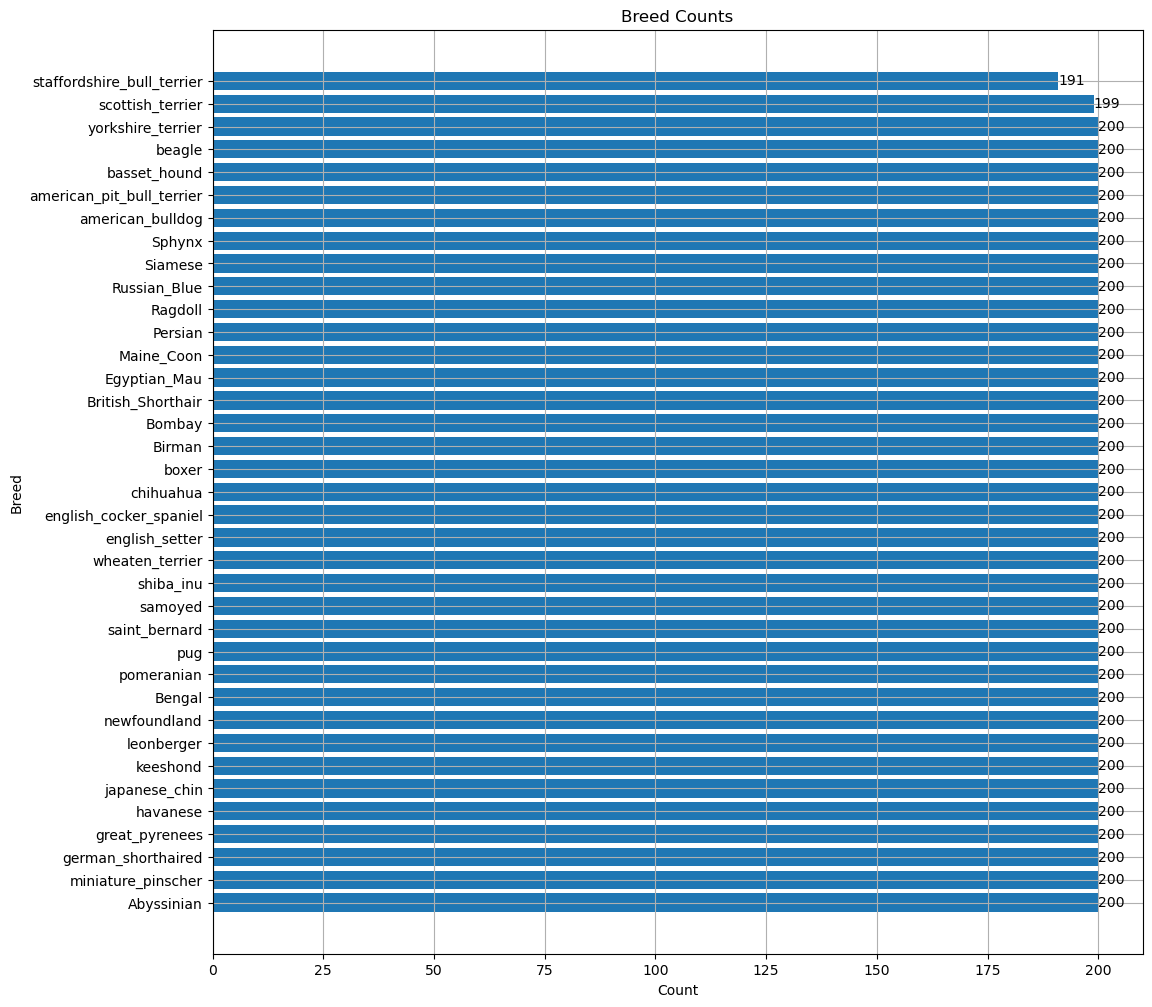

In [9]:
# Plot the distribution of breeds in the dataset
breed_counts = df['breed'].value_counts()

plt.figure(figsize=(12,12))
bars = plt.barh(breed_counts.index, breed_counts.values)

for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, str(width), ha='left', va='center')

plt.ylabel('Breed')
plt.xlabel('Count')
plt.title('Breed Counts')
plt.grid()
plt.show()

- Analise the data to Multiclass classification

In [10]:
# unique breeds
print(len(df['species'].unique()))
print(df['species'].unique())


2
['cat' 'dog']


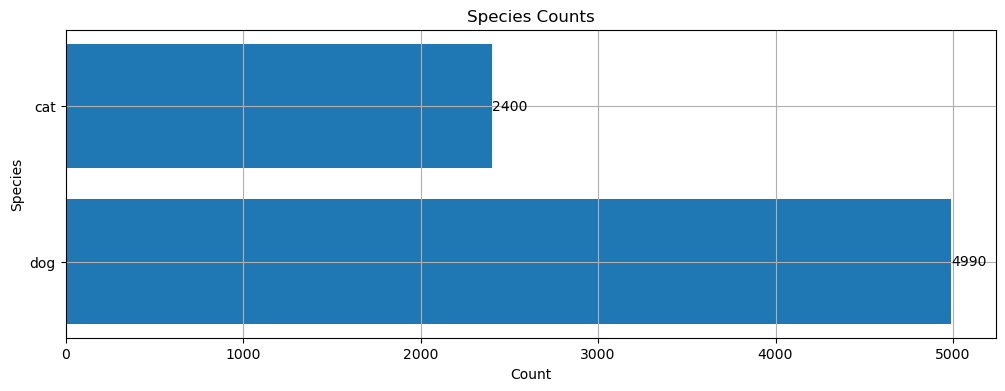

In [11]:
# Plot the distribution of species in the dataset
species_counts = df['species'].value_counts()

plt.figure(figsize=(12,4))
bars = plt.barh(species_counts.index, species_counts.values)

for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, str(width), ha='left', va='center')


plt.ylabel('Species')
plt.xlabel('Count')
plt.title('Species Counts')
plt.grid()
plt.show()


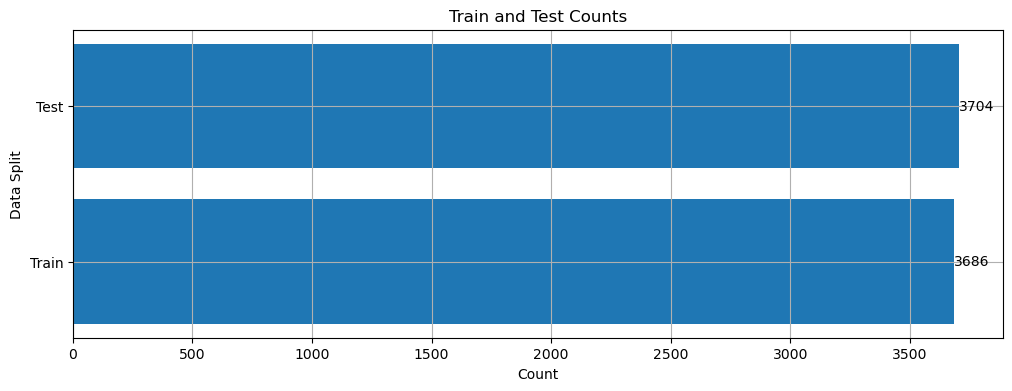

In [12]:
train_counts = len(df[df['foldTrain'] == True])
test_counts = len(df[df['foldTrain'] == False])

# Plot the distribution of training and testing
plt.figure(figsize=(12,4))
labels = ['Train', 'Test']
counts = [train_counts, test_counts]

bars = plt.barh(labels, counts)

for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, str(width), ha='left', va='center')


plt.xlabel('Count')
plt.ylabel('Data Split')
plt.title('Train and Test Counts')
plt.grid()
plt.show()

# print(train_counts, test_counts)


### Visualize the data

NameError: name 'X' is not defined

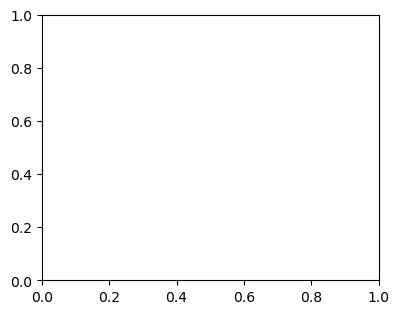

In [13]:
# Plot 5*4 random images from the training set
plt.figure(figsize=(20,20))
plt.title('Random Images')
for i in range(20):
    plt.subplot(5,4,i+1)
    plt.imshow(keras.preprocessing.image.array_to_img(X[i]))
    plt.title(y[i] + " - " + filesDic.get(image_files[i]).get('species'))
    plt.axis('off')
plt.show()


#### Visualize the detection

In [ ]:
# Com a coluna bndBox (oordenadar do retangulo) mostrar as imagens com o retangulo na imagem bndBox
import random
import matplotlib.image as mpimg
import matplotlib.patches as patches

# remover as imagens que nao tem bndBox
selected_images = {k: v for k, v in filesDic.items() if v.get('bndBox') != []}
selected_image_keys = list(selected_images.keys())

# Escolher 10 imagens aleatórias
random_image_files = random.sample(selected_image_keys, 20)

fig, axes = plt.subplots(4, 5, figsize=(20, 20))

for i, ax in enumerate(axes.flat):
    if i < len(random_image_files):
        image_file = random_image_files[i]
        bndBox = filesDic.get(image_file).get('bndBox')
        if bndBox is not None:
            # Carregar a imagem
            img = keras.preprocessing.image.load_img(os.path.join("./images/", image_file))

            # Converter a imagem para array numpy
            Ximg = keras.preprocessing.image.img_to_array(img)

            # Exibir a imagem
            ax.imshow(keras.preprocessing.image.array_to_img(Ximg))

            # Adicionar o retângulo de detecção
            if bndBox is not None and len(bndBox) == 4:
                Xc, Yc, width, height = bndBox
                rect = plt.Rectangle((Xc, Yc), width, height, linewidth=2, 
                                    edgecolor='r', facecolor='none')
                ax.add_patch(rect)

            s = filesDic.get(image_file).get('breed') + " ( " + filesDic.get(image_file).get('species') + " ) "
            ax.set_title(s, fontsize=16)

    ax.axis('off')

plt.tight_layout()
plt.show()



### 2. Data preprocessing
   - 0.1 Redimensionar as imagens para 128x128
   - 0.2 Dividir o conjunto de dados em treino e teste
   - 0.3 Normalizar os dados
   - 0.4 One-hot encoding dos labels
   - 0.5 Dividir o conjunto de treino em treino e validacao
   - 0.6 Data augmentation
   - Get the data into the right shape?
<!-- # 2. Preprocessing the data
   - Preprocessing the data to binary classification
   - Preprocessing the data to Multiclass classification -->


- Problens with the data and the images
1. The images have different sizes
2. The number of images per classes (multiclasse) is different (200, 191, 199)
3. the number of images per classes (binary) is different (cats- 2400, dogs- 4990 )
4. The number of images in training and testing is different but 50/50 (3686/3704)
<!-- 
- Solutions
1. Redimensionar as imagens: Para garantir que todas as imagens tenham o mesmo tamanho, 
pode-se redimensioná-las para um tamanho fixo usando bibliotecas de processamento de imagens como o OpenCV. Por exemplo, você pode redimensionar todas as imagens para um tamanho de 224x224 pixels. 
Isso garantirá consistência nas dimensões das imagens.

2. Lidar com classes desbalanceadas (Multiclasse): Se o número de imagens por classe no seu problema de classificação multiclasse for diferente, você pode usar técnicas para lidar com o desbalanceamento de classes. Uma abordagem comum é aumentar as classes minoritárias gerando imagens adicionais por meio de técnicas como aumento de dados (por exemplo, rotações aleatórias, espelhamentos, zoom) ou usando técnicas como o SMOTE (Synthetic Minority Over-sampling Technique) para equilibrar a distribuição das classes.
3. igual a 2 mas para o problema de classificação binária.

4. Balancear conjuntos de treinamento e teste: Se o número de imagens nos conjuntos de treinamento e teste for diferente, mas você deseja uma divisão equilibrada (50/50 neste caso), você pode ajustar a proporção da divisão para obter uma distribuição equilibrada. Por exemplo, você pode usar amostragem estratificada durante a divisão de treinamento e teste para garantir que as proporções das classes sejam mantidas consistentes entre os conjuntos. -->




##### Data processing a partir de X e y

In [ ]:
Xa = np.array(Xi, dtype=object)
y = np.array(y, dtype=object)

print(Xa.shape, y.shape)

from sklearn.model_selection import train_test_split

# Split the data into training, validation, testing (80%, 10%, 10%)
X1, X2, y1, y2 = train_test_split(Xa, y, test_size=0.2, random_state=42)
X2, X3, y2, y3 = train_test_split(X2, y2, test_size=0.5, random_state=42)

# Plot the distribution of breeds in the training set
# breed_counts = pd.Series(y1).value_counts()
# bars = plt.barh(breed_counts.index, breed_counts.values)

X1 = np.array(X1)
X2 = np.array(X2)
X3 = np.array(X3)

y1 = keras.utils.to_categorical(y1)
y2 = keras.utils.to_categorical(y2)
y3 = keras.utils.to_categorical(y3)

print("Dados de trein:", X1.shape, y1.shape)
print("Dados de valid:", X2.shape, y2.shape)
print("Dados de test:", X3.shape, y3.shape)

# # Redimensionar os dados de treinamento
# X1 = np.expand_dims(X1, axis=-1)  # Adicionar dimensão extra para canais de cor (escala de cinza)

# # Redimensionar os dados de validação
# X2 = np.expand_dims(X2, axis=-1)  # Adicionar dimensão extra para canais de cor (escala de cinza)

# # Redimensionar os dados de teste
# X3 = np.expand_dims(X3, axis=-1)  # Adicionar dimensão extra para canais de cor (escala de cinza)

# print("Dados de trein:", X1.shape, y1.shape)
# print("Dados de valid:", X2.shape, y2.shape)
# print("Dados de test:", X3.shape, y3.shape)

# Create ImageDataGenerator object with desired data augmentation techniques
dataGen = ImageDataGenerator(
    rescale=1./255
    # Add more augmentation techniques here if desired
)
# Create generators for training, validation, and testing data
batch_size = 32
trainGen = dataGen.flow(X1, y1, batch_size=batch_size)
validGen = dataGen.flow(X2, y2, batch_size=batch_size)
testGen = dataGen.flow(X3, y3, batch_size=1, shuffle=False)


# dataGen=ImageDataGenerator(rescale=1./255)
# trainGen=dataGen.flow(X1, y1,batch_size=300)
# validGen=dataGen.flow(X2, y2,batch_size=100)

# #testGen = ImageDataGenerator(rescale=1./255).flow(X_test, shuffle=False, batch_size=1)
# testGen=ImageDataGenerator(rescale=1./255)
# testGen=testGen.flow(X3, y3, batch_size=1000, shuffle=False)



(7390,) (7390,)


In [10]:
breedsDir = './breeds/'

breedsGen = ImageDataGenerator(preprocessing_function=preprocess_input)

breedsTrainGen = breedsGen.flow_from_directory(
    directory=breedsDir + 'train/',
    target_size=(128, 128),
    # color_mode="rgb",
    batch_size=32,
    class_mode="categorical",
    # shuffle=True,
    # seed=42
)
breedsTrainGen.num_classes

Found 3686 images belonging to 37 classes.


37

##### Data processing a partir das pastas

In [3]:
def createFolders(classDic):
    """
    Creates the folders to store the images
    """
    for breed in list(classDic.keys()):
        # Breeds
        trainPath = os.path.join('./breeds/train/' + breed)
        if not os.path.exists(trainPath):
            os.makedirs('./breeds/train/' + breed)

        testPath = os.path.join('./breeds/test/' + breed)
        if not os.path.exists(testPath):
            os.makedirs('./breeds/test/' + breed)

        # Dogs
        trainPath = os.path.join('./species/train/dog')
        if not os.path.exists(trainPath):
            os.makedirs('./species/train/dog')

        testPath = os.path.join('./species/test/dog')
        if not os.path.exists(testPath):
            os.makedirs('./species/test/dog')

        # Cats
        trainPath = os.path.join('./species/train/cat')
        if not os.path.exists(trainPath):
            os.makedirs('./species/train/cat')

        testPath = os.path.join('./species/test/cat')
        if not os.path.exists(testPath):
            os.makedirs('./species/test/cat')


def splitData(filesDic, type='breeds'):
    X1 = [] 
    X2 = [] 
    y1 = []
    y2 = []
    
    i = 1
    size = len(list(filesDic.keys()) )
    for imgName in list(filesDic.keys()):
        
        img = keras.preprocessing.image.load_img('images/' + imgName)
        foldTrain = filesDic.get(imgName).get('foldTrain')

        '''
        # t = 'breed' if type == 'breeds' else 'species'

        # print(type, imgName, foldTrain, t)
        # print(filesDic.get(imgName).get(t))
        # print(filesDic.get(imgName).get(type))

        # create X1 (Train images), X2 (Test images), y1 (Train labels), y2 (Test labels)
        # if foldTrain:
        #     X1.append(keras.preprocessing.image.img_to_array(img))
        #     y1.append(filesDic.get(imgName).get(t))
        # else:
        #     X2.append(keras.preprocessing.image.img_to_array(img))
        #     y2.append(filesDic.get(imgName).get(t))
        
        # print(type, imgName, foldTrain)
        # print('./' + type +'/' + 
        #       ('train/' if foldTrain else 'test/') + 
        #     filesDic.get(imgName).get('breed') + '/' + imgName, img)'''
        
        keras.preprocessing.image.save_img('./' + str(type) +'/' + 
                                           ('train/' if foldTrain else 'test/') +
                                           filesDic.get(imgName).get(str(type)) + 
                                           '/' + imgName, img)
        # if size % 10 == 0:
        #     print( i, "in", size, (i/size)*100, "%")
        # i += 1
    # return np.array(X1), np.array(X2), np.array(y1), np.array(y2)


# Muito lento - Correr apenas uma vez e se nao tiver as pastas criadas
# createFolders(classDic)
# X1b, X2b, y1b, y2b = splitData(filesDic, type='breeds') # Binary classification
# X1m, X2m, y1m, y2m = splitData(filesDic, type='species') # Multi-class classification

# %%time 2 min - image_files muito lento
image_files = [f for f in os.listdir("./images/") if os.path.isfile(os.path.join("./images/", f)) and not f.endswith('.mat')]


dict_keys(['classDic', 'filesDic'])


## 3. Data Generators

##### Data Generators for multiclasse classification

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data Generators for multiclasse classification
breedsDir = './breeds/'

# multi-class classification
breedsGen = ImageDataGenerator(preprocessing_function=preprocess_input)

# multi-class classification with data argumetation
breedsGenAug = ImageDataGenerator(preprocessing_function=preprocess_input,
                                  rotation_range=30,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode="nearest")
# dados de treino
breedsTrainGen = breedsGen.flow_from_directory(directory=breedsDir + "train/",
                                               target_size=(224, 224),
                                               class_mode="categorical",
                                               batch_size=32)
# dados de treino com augumentation
breedsTrainGenAug = breedsGenAug.flow_from_directory(directory=breedsDir + "train/",
                                                     target_size=(224, 224),
                                                     class_mode="categorical",
                                                     batch_size=32)
# dados de teste
breedsTestGen = breedsGen.flow_from_directory(directory=breedsDir + "test/",
                                              target_size=(224, 224),
                                              class_mode="categorical",
                                              batch_size=32)


##### Data Generators for binary classification

In [ ]:
# Data Generators for binary classification

# Data Generators for binary classification
speciesDir = './species/'

# Binary classification
speciesGen = ImageDataGenerator(preprocessing_function=preprocess_input)

# Binary classification with augumentation
speciesGenAug = ImageDataGenerator(preprocessing_function=preprocess_input,
                                   rotation_range=30,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode="nearest")

# dados de treino
speciesTrainGen = speciesGen.flow_from_directory(directory=speciesDir + "train/",
                                                 target_size=(224, 224),
                                                 class_mode="categorical",
                                                 batch_size=32)

# dados de treino com augumentation
speciesTrainGenAug = speciesGenAug.flow_from_directory(directory=speciesDir + "train/",
                                                       target_size=(224, 224),
                                                       class_mode="categorical",
                                                       batch_size=32)

# dados de teste
speciesTestGen = speciesGen.flow_from_directory(directory=speciesDir + "test/",
                                                target_size=(224, 224),
                                                class_mode="categorical",
                                                batch_size=32)


## 4. CNN networks

##### Species Cnn network

In [ ]:
speciesCnn = models.Sequential()

speciesCnn.add(layers.Conv2D(6, (5, 5), activation='relu',
                             input_shape=(224, 224, 3), padding="same"))
speciesCnn.add(layers.AveragePooling2D((2, 2)))
speciesCnn.add(layers.Conv2D(16, (5, 5), activation='relu'))
speciesCnn.add(layers.AveragePooling2D((2, 2)))
speciesCnn.add(layers.Conv2D(120, (1, 1), activation='relu'))
speciesCnn.add(layers.Flatten())
speciesCnn.add(layers.Dense(64, activation='relu'))
speciesCnn.add(layers.Dense(2, activation='softmax'))  # 2 species

speciesCnn.summary()

speciesCnn.compile(optimizer="nadam",
                   loss="categorical_crossentropy",
                   metrics=["accuracy"])

##### Breeds Cnn network

In [ ]:
breedsCnn = models.Sequential()

breedsCnn.add(layers.Conv2D(6, (5, 5), activation='relu',
                            input_shape=(224, 224, 3), padding="same"))
breedsCnn.add(layers.AveragePooling2D((2, 2)))
breedsCnn.add(layers.Conv2D(16, (5, 5), activation='relu'))
breedsCnn.add(layers.AveragePooling2D((2, 2)))
breedsCnn.add(layers.Conv2D(120, (1, 1), activation='relu'))
breedsCnn.add(layers.Flatten())
breedsCnn.add(layers.Dense(64, activation='relu'))
breedsCnn.add(layers.Dense(37, activation='softmax'))  # 37 breeds

breedsCnn.summary()

breedsCnn.compile(optimizer="nadam",
                  loss="categorical_crossentropy",
                  metrics=["accuracy"])

##### Pre trained network

In [ ]:
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input

mn2 = MobileNetV2(weights='imagenet',
                  input_shape=(224, 224, 3))

mn2.trainable = False

# mn2.summary()

breedsMn2Cnn = models.Sequential()
breedsMn2Cnn.add(mn2)
breedsMn2Cnn.add(layers.Flatten())
breedsMn2Cnn.add(layers.Dense(37, activation='softmax'))  # 37 breeds

breedsMn2Cnn.summary()

breedsMn2Cnn.compile(optimizer="nadam",
                     loss="categorical_crossentropy",
                     metrics=["accuracy"])

## 5. Treinos e avaliacões

In [ ]:
epochs = 25
# steps_per_epoch = 100
# validation_steps = 50
# batch_size = 32

import matplotlib.pyplot as plt

def plot_history(history):
    # h=train.history
    plt.figure(figsize=(15,5))
    # print(history.keys())

    plt.subplot(1, 2, 1)
    plt.title('Model accuracy')
    plt.plot(history["accuracy"], label='Accuracy')
    plt.plot(history["val_accuracy"], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.title('Model loss')
    plt.plot(history["loss"], label='Loss')
    plt.plot(history["val_loss"], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    #plt.axis([0,100,0,5.25])
    #plt.ylim([0.5, 1])

    plt.show()

def metrics(model, X, y):
    y_pred = model.predict(X)
    y_pred = np.argmax(y_pred, axis=1)
    y_true = np.argmax(y, axis=1)
    print(classification_report(y_true, y_pred))
    print(confusion_matrix(y_true, y_pred))
    print('Total number of errors: ', np.sum(y2 != y_pred))
    print('Accuracy: ', np.sum(y2 == y_pred) / y2.shape[0] * 100)



### 5.1 Binary (Species)

In [ ]:
## CNN from scratch without data augmentation
logspeciesCnn = speciesCnn.fit(speciesTrainGen,
                     epochs=epochs,
                     validation_data=speciesTestGen)

In [ ]:
plot_history(logspeciesCnn.history)
metrics(speciesCnn, speciesTestGen, speciesTestGen)  # Ta mal

In [ ]:
## Com MobileNetV2 network without data augmentation
# treino e metricas
# fazer?

In [ ]:
## CNN from scratch with data augmentation
logspeciesCnnAug = speciesCnn.fit(speciesTrainGenAug,
                     epochs=epochs,
                     validation_data=speciesTestGen)

In [ ]:
plot_history(logspeciesCnnAug.history)
metrics(speciesCnn, speciesTestGen, speciesTestGen) # Ta mal e falta guardar os dados

In [ ]:
## Com MobileNetV2 network With data augmentation
# treino e metricas
# fazer?

### 5.2 Multi-class (Breeds)

In [ ]:
## CNN from scratch without data augmentation
logbreedsCnn = breedsCnn.fit(breedsTrainGen,
                    epochs=epochs,
                    validation_data=breedsTestGen)
# Metricas
# plot_history(logspeciesCnn.history)
# metrics(speciesCnn, speciesTestGen, speciesTestGen)  # Ta mal

In [ ]:
## Com MobileNetV2 network without data augmentation
logbreedsMn2Cnn = breedsMn2Cnn.fit(breedsTrainGen,
                       epochs=epochs,
                       validation_data=breedsTestGen)
# Metricas

In [ ]:
## CNN from scratch with data augmentation
logbreedsCnnAug = breedsCnn.fit(breedsTrainGenAug,
                    epochs=epochs,
                    validation_data=breedsTestGen)
# Metricas

In [ ]:
## Com MobileNetV2 network With data augmentation
logbreedsMn2CnnAug = breedsMn2Cnn.fit(breedsTrainGenAug,
                       epochs=epochs,
                       validation_data=breedsTestGen)
# Metricas